<a href="https://colab.research.google.com/github/FernandoSimon22/vision_artificial/blob/main/yolov10n_(Monoclase%26COCO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Sep  8 19:04:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("am_boundingbox")
version = project.version(22)
dataset = version.download("yolov9")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AM_BoundingBox-22 in yolov9:: 100%|██████████| 462/462 [00:00<00:00, 7831.58it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

# Load YOLOv10n model from scratch
model = YOLO("yolov10n.pt")

# Train the model
model.train(data="/content/AM_BoundingBox-22/data.yaml", epochs=200, imgsz=768, batch=8, lr0=0.001, val=True)

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AM_BoundingBox-22/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4b3f7c6360>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
!yolo detect val model=/content/runs/detect/train2/weights/best.pt data=/content/AM_BoundingBox-22/data.yaml conf=0.3 iou=0.5

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,363 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1523.9±253.0 MB/s, size: 37.8 KB)
val: Scanning /content/AM_BoundingBox-22/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 412.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.4it/s 1.4s
                   all         23        995      0.651      0.536      0.587      0.293
Speed: 10.0ms preprocess, 28.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [7]:
!yolo detect predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/AM_BoundingBox-22/test/images

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,363 parameters, 0 gradients, 6.5 GFLOPs

image 1/19 /content/AM_BoundingBox-22/test/images/03b55942-2_2_png.rf.d721f222016b28d9816d50c8ab0d4cd3.jpg: 768x768 8 defs, 12.1ms
image 2/19 /content/AM_BoundingBox-22/test/images/18a9bd68-6_95_png.rf.deee8ae7b93641b3a06e4fe3c98e7a01.jpg: 768x768 7 defs, 10.7ms
image 3/19 /content/AM_BoundingBox-22/test/images/5350952f-3_11_png.rf.a2b986bada8b9133f9254f8e18515e45.jpg: 768x768 30 defs, 9.7ms
image 4/19 /content/AM_BoundingBox-22/test/images/549e3e20-6_91_png.rf.fff6fce93929c24a5a8bc1051763a10d.jpg: 768x768 9 defs, 9.5ms
image 5/19 /content/AM_BoundingBox-22/test/images/565c696e-5_11_png.rf.9cb5665c98493e422a676294b62796aa.jpg: 768x768 18 defs, 9.4ms
image 6/19 /content/AM_BoundingBox-22/test/images/59298473-3_2_png.rf.572e0f5490d3c9315a5844ff1ab25d2e.jpg: 768x768 (no detections), 13.9ms
image 7/19 /content/AM_BoundingBox

In [8]:
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 923, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['benchmark', 'predict', 'train', 'val', 'track', 'export'].

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'obb', 'segment', 'detect', 'classify']
                MODE (required) is one of ['benchmark', 'predict', 'train', 'val', 'track', 'export']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
      

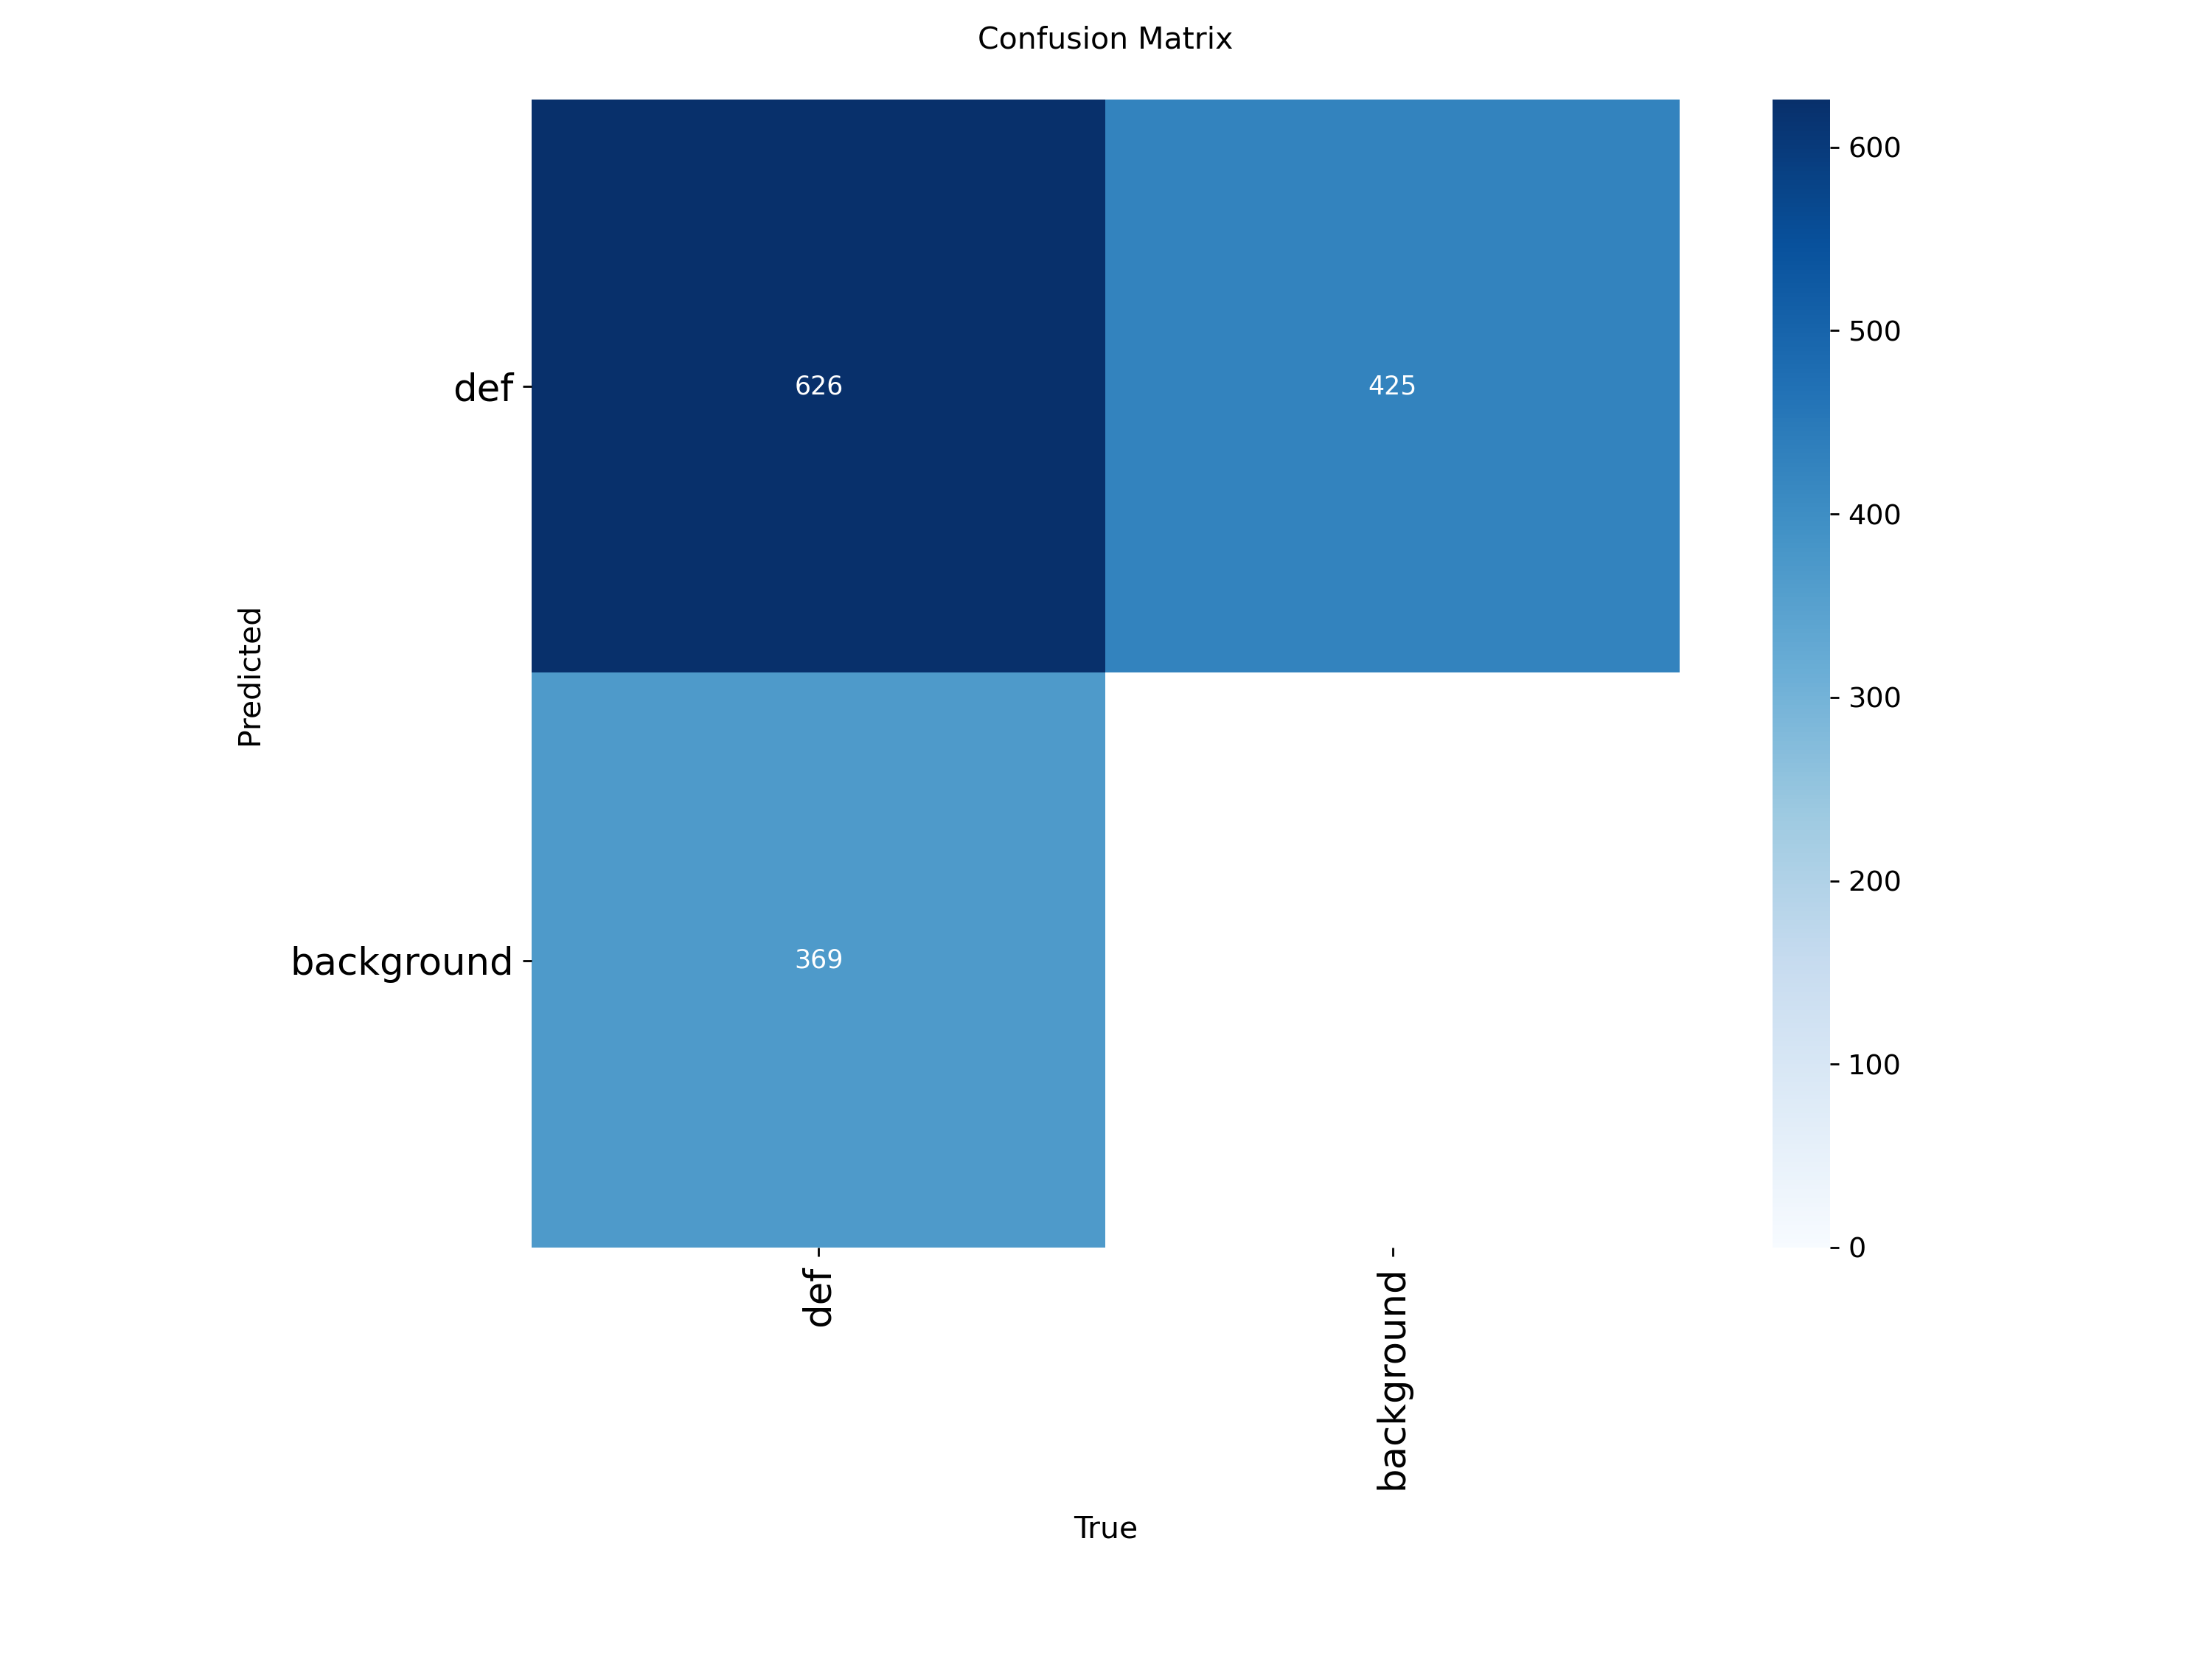

In [9]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

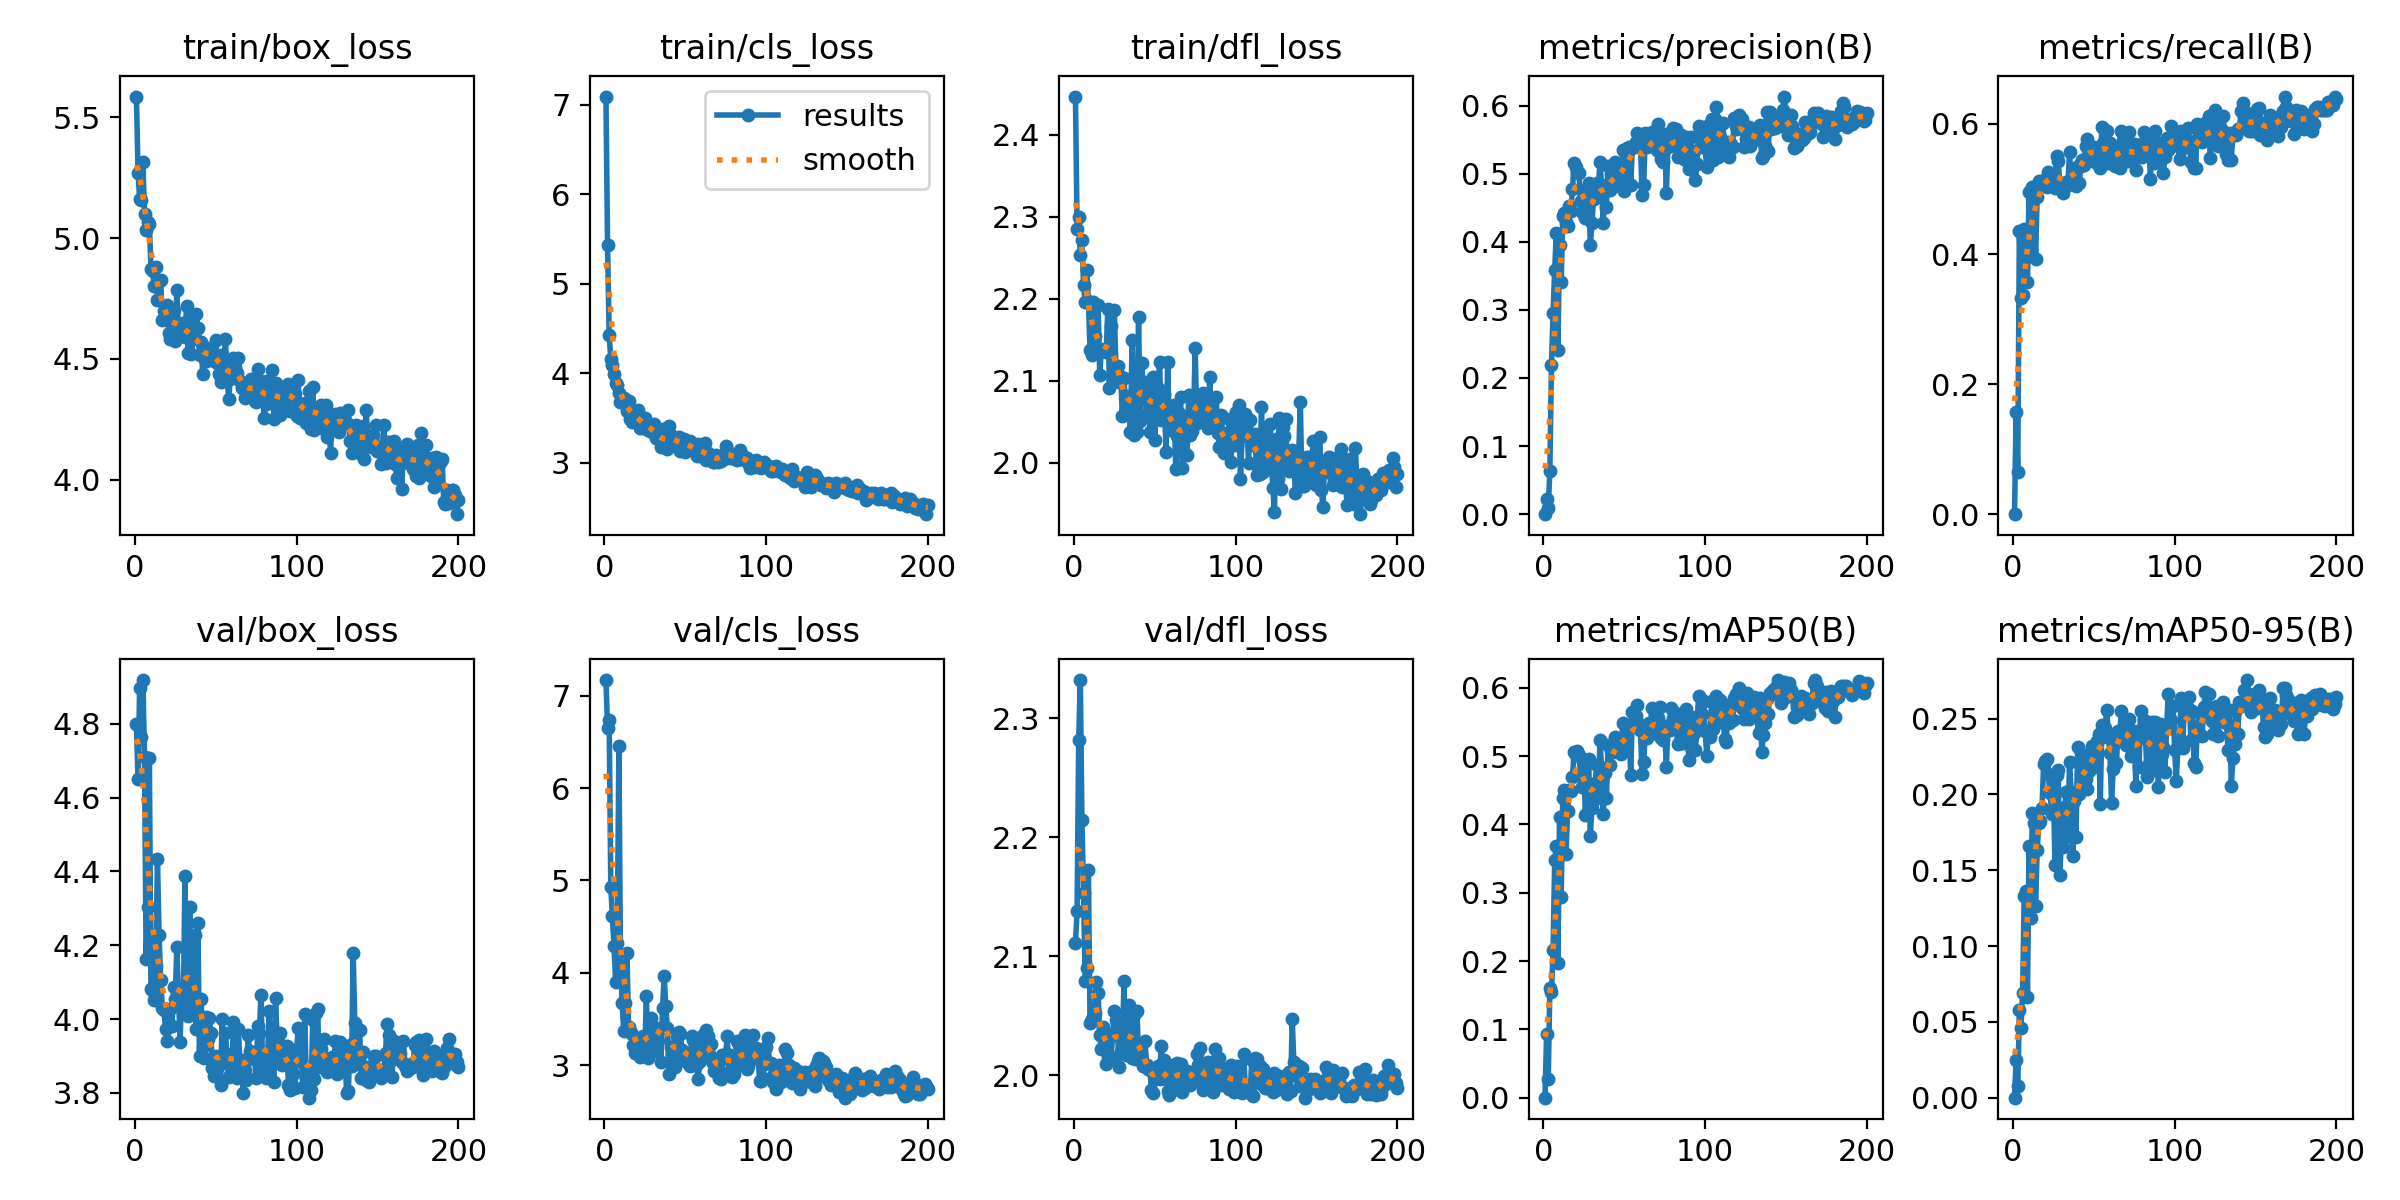

In [10]:
Image(filename=f'/content/runs/detect/train2/results.png', width=800)

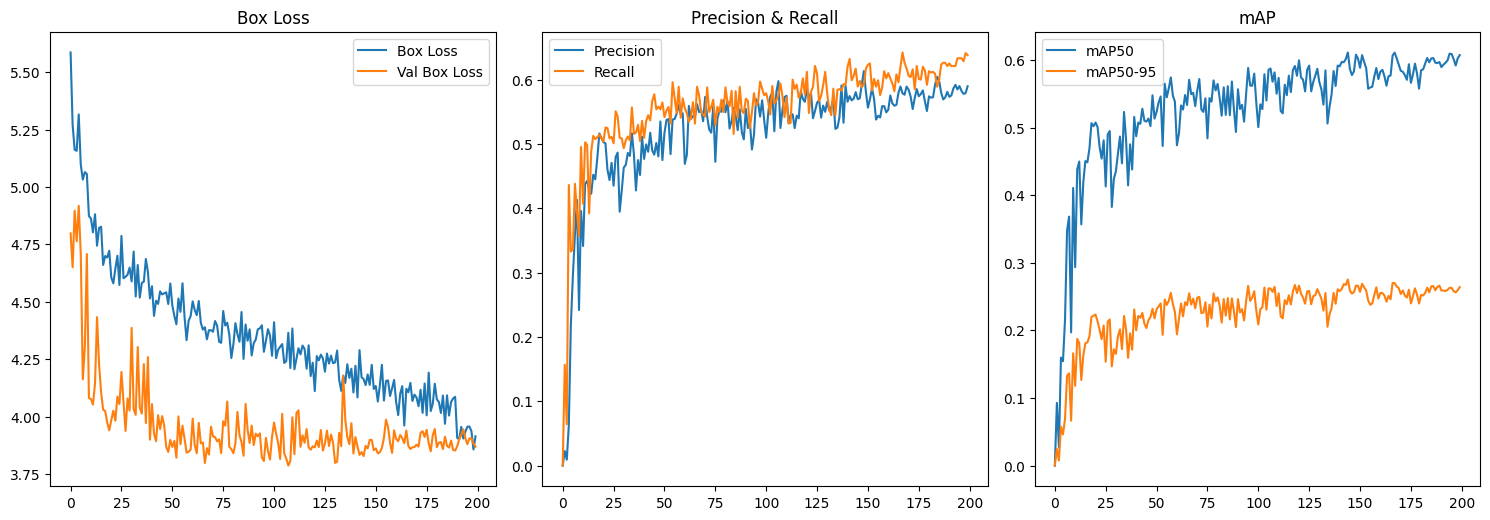

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el CSV con los datos del entrenamiento
df = pd.read_csv('/content/runs/detect/train2/results.csv')

# Definir resolución de salida
plt.figure(figsize=(15, 10))  # Más grande = más píxeles

# Graficar algunas métricas
plt.subplot(2, 3, 1)
plt.plot(df['train/box_loss'], label='Box Loss')
plt.plot(df['val/box_loss'], label='Val Box Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 3, 2)
plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.legend()
plt.title('Precision & Recall')

plt.subplot(2, 3, 3)
plt.plot(df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.legend()
plt.title('mAP')

plt.tight_layout()
plt.savefig('/content/results_hd.png', dpi=300)  # Guardar en alta resolución
plt.show()


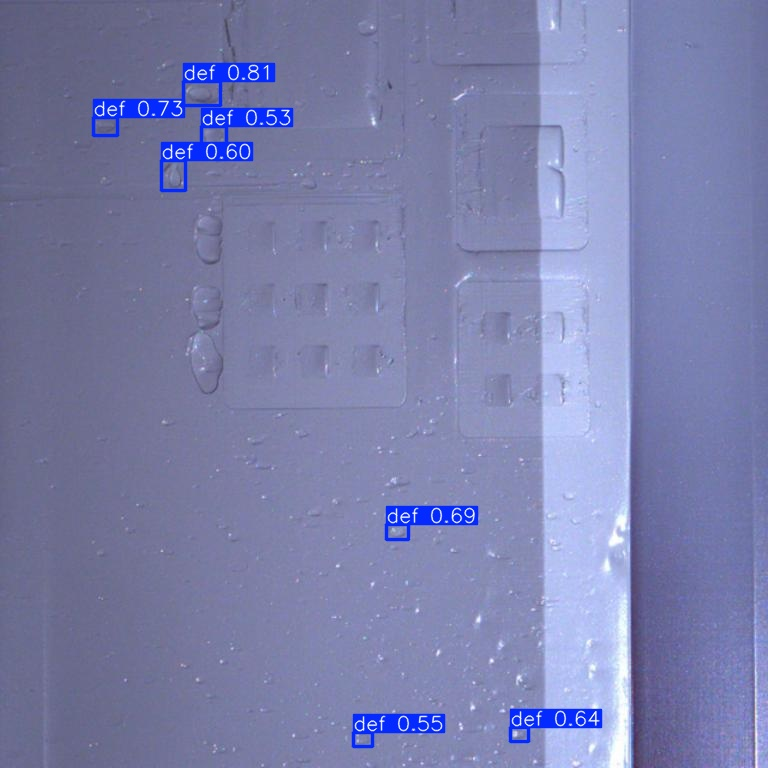

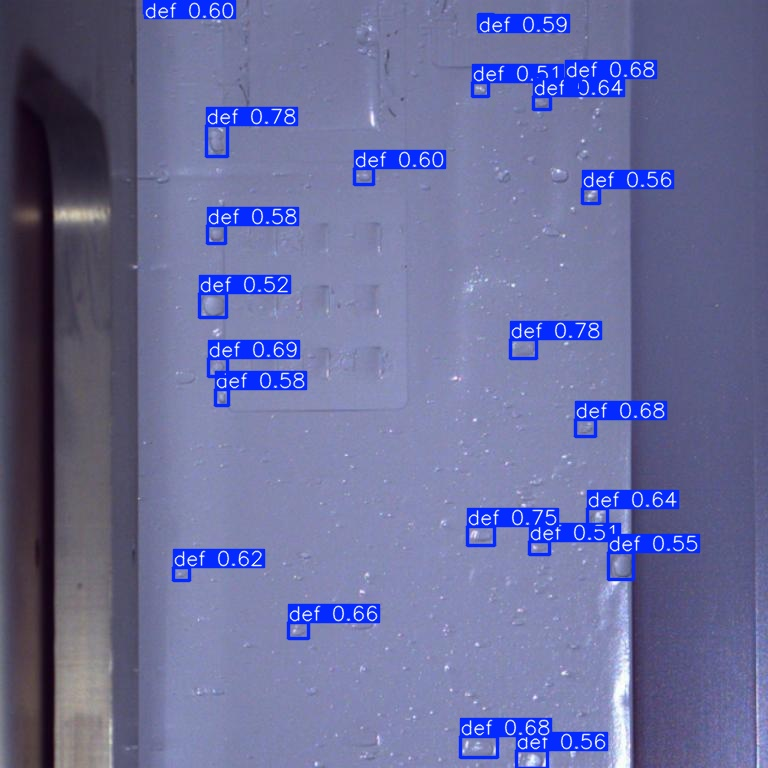

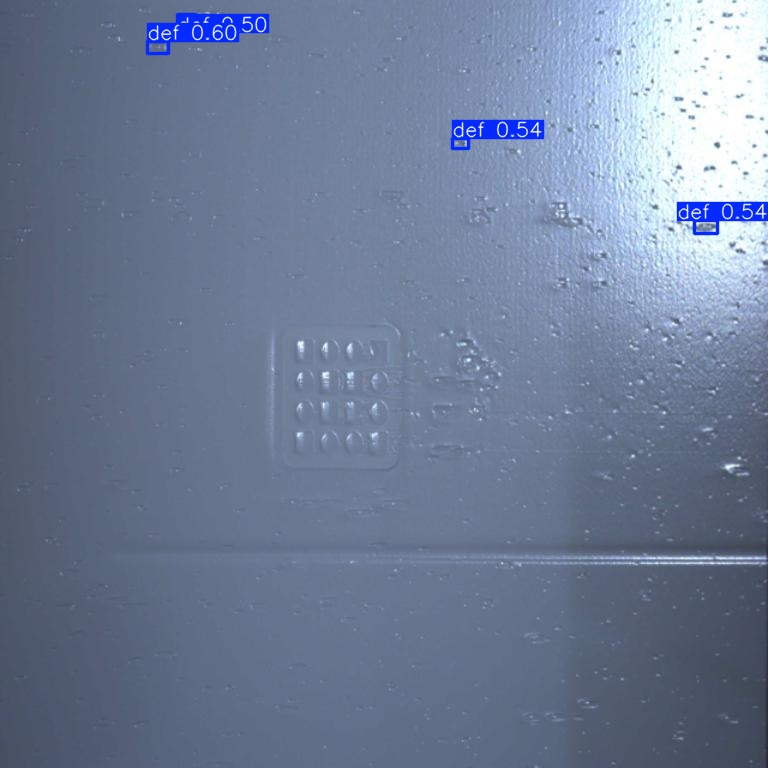

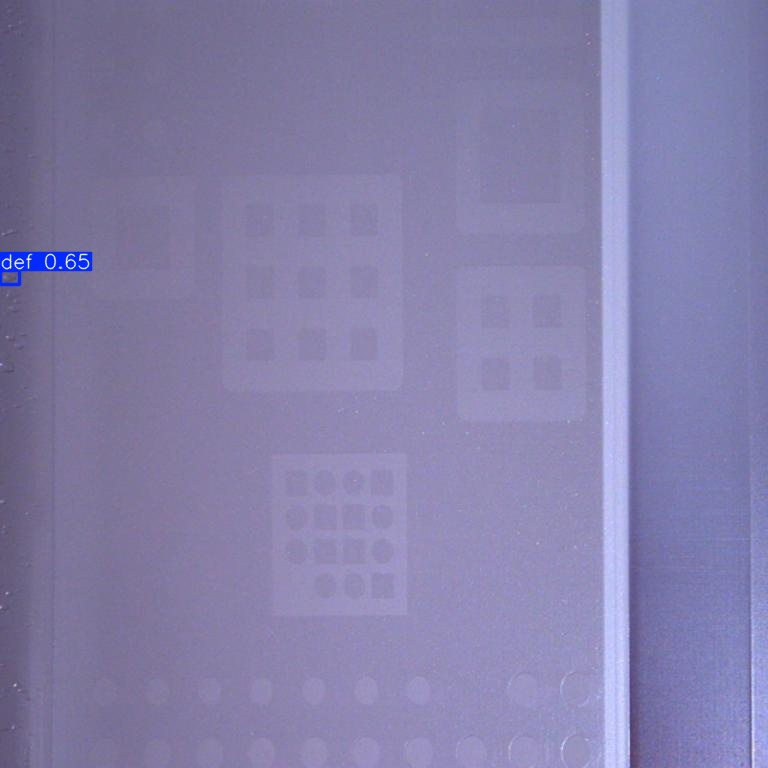

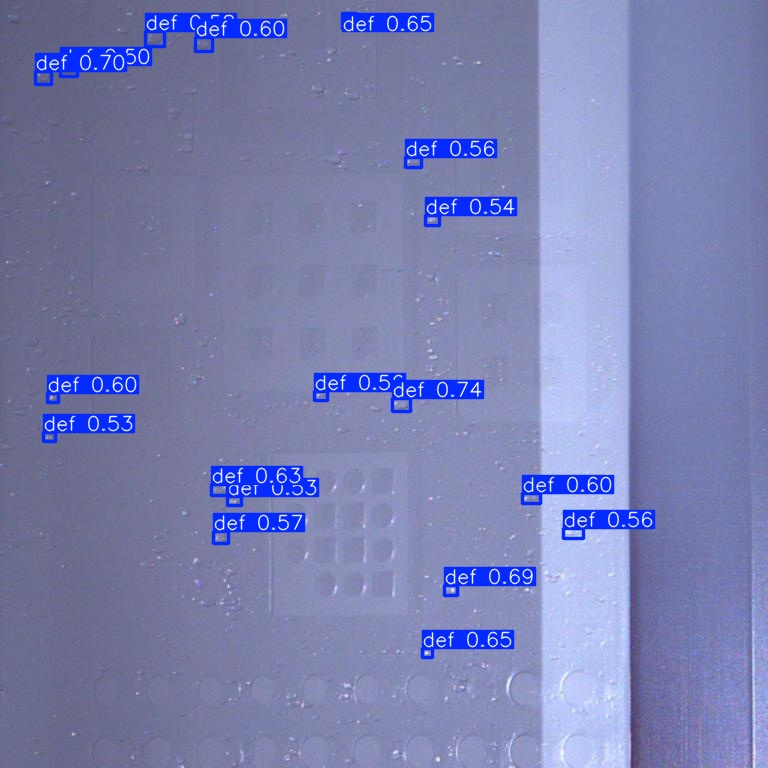

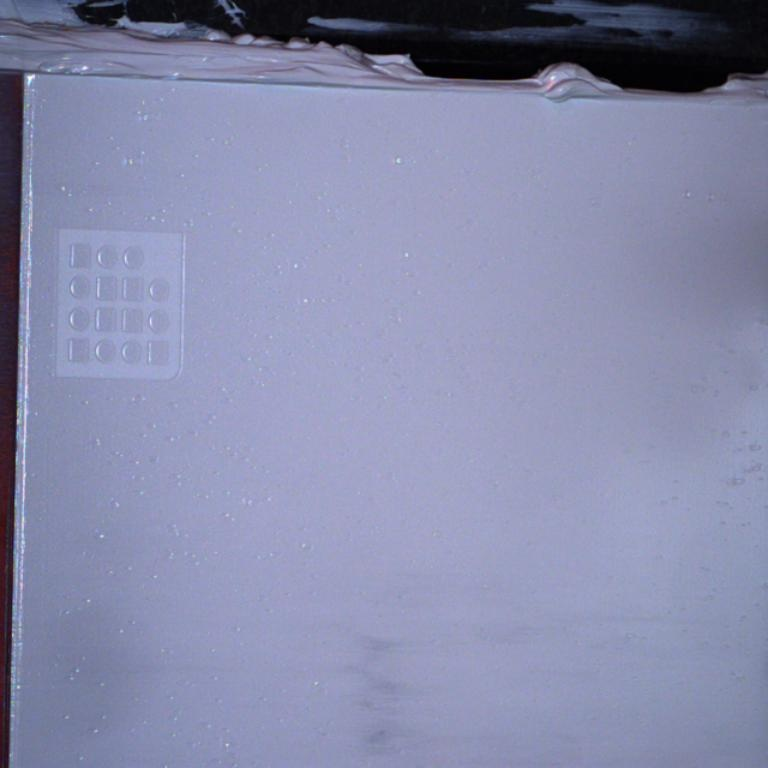

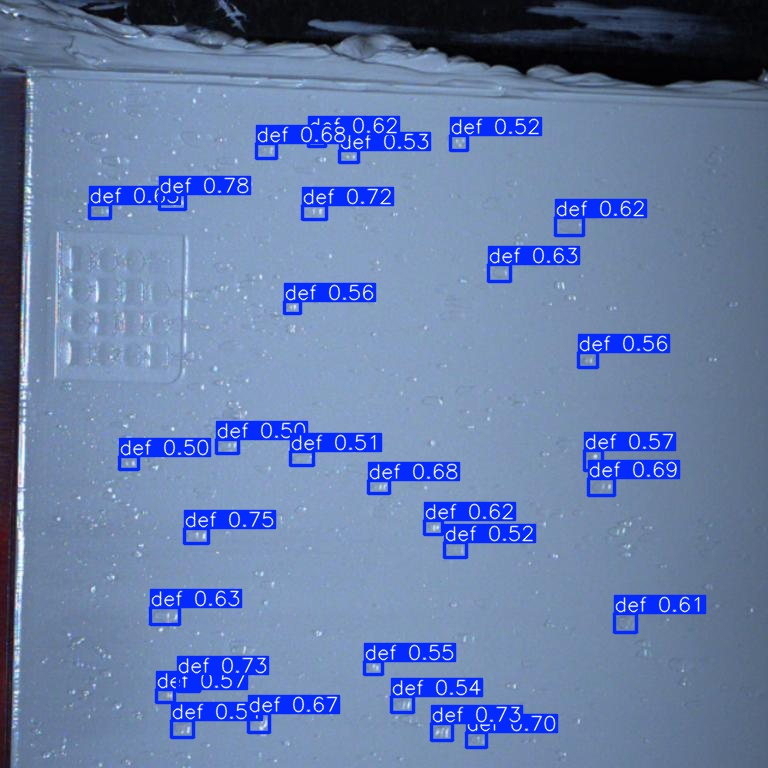

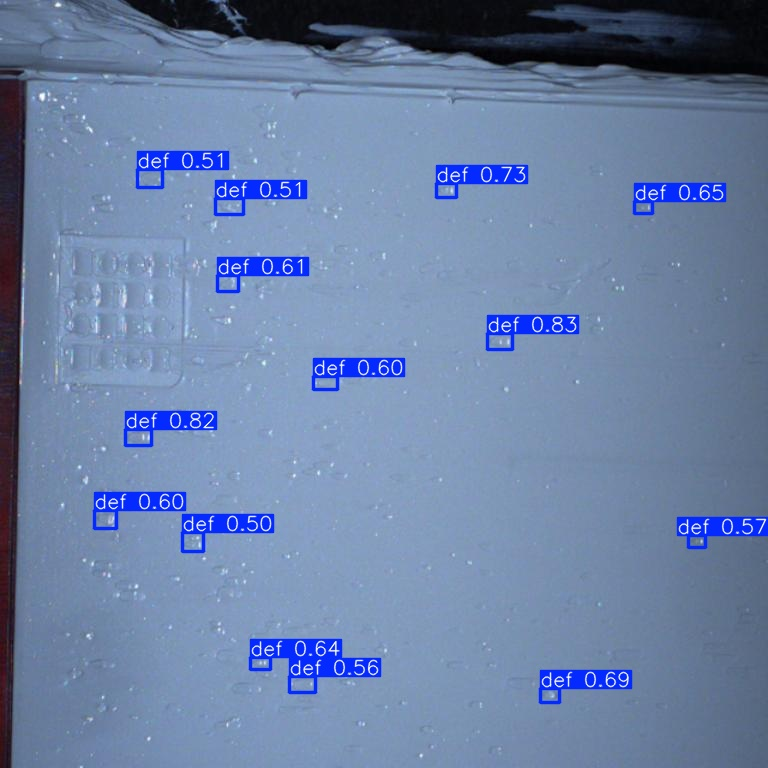

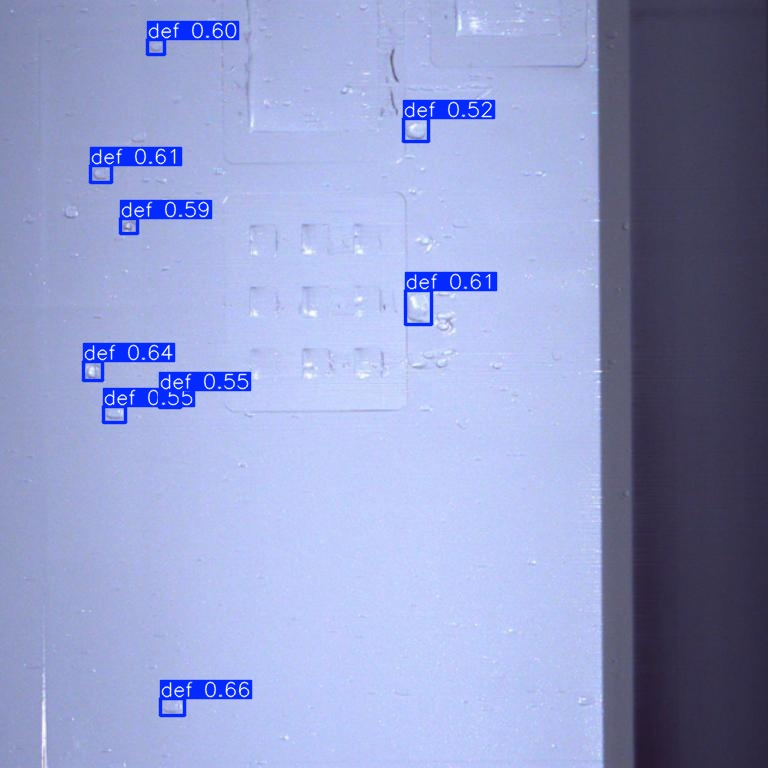

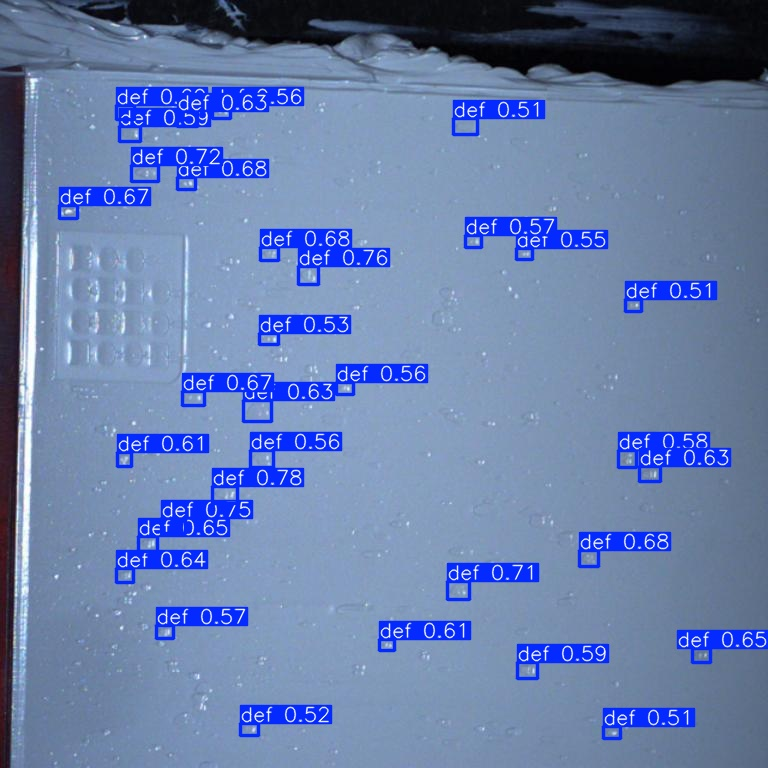

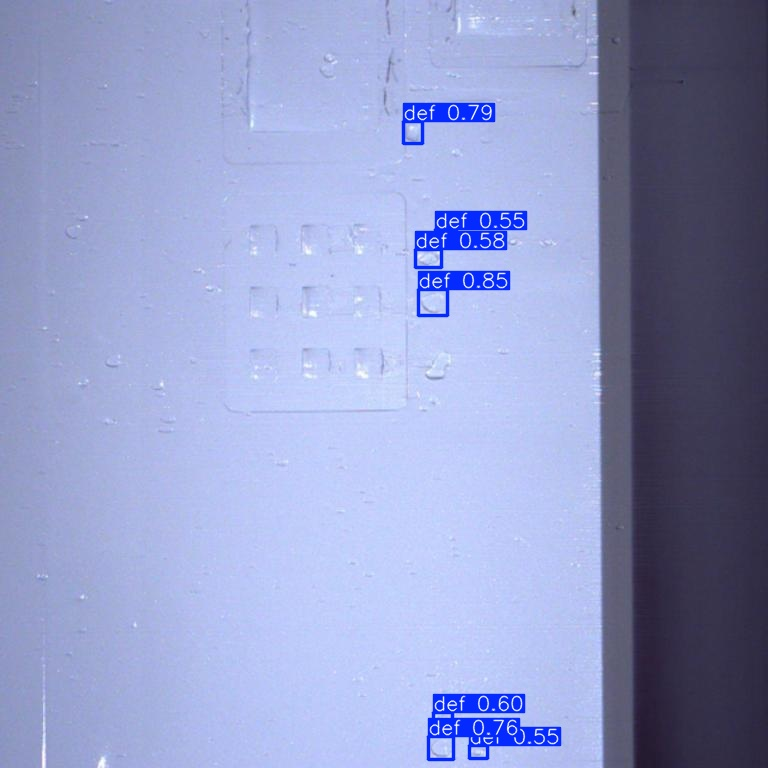

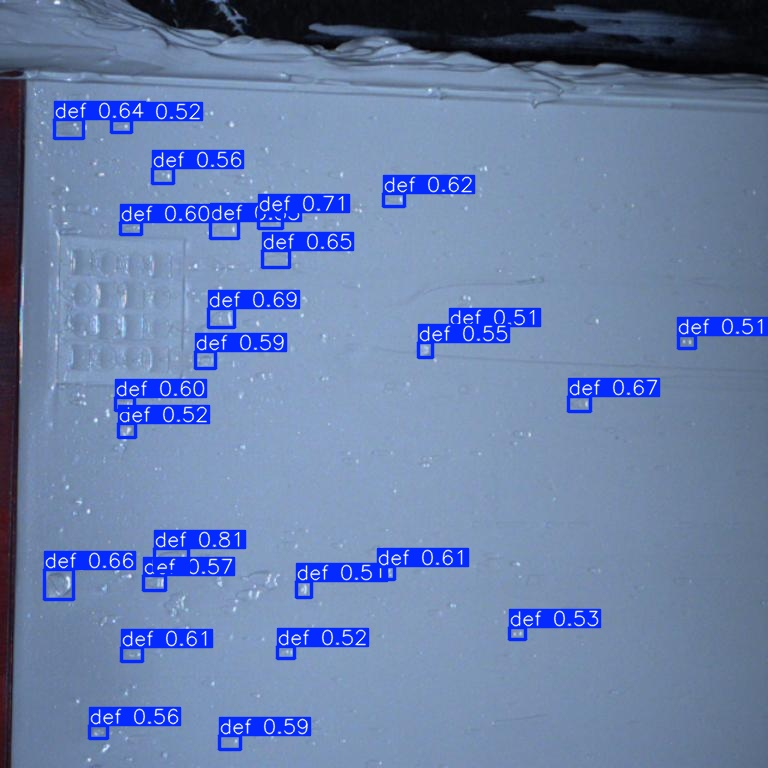

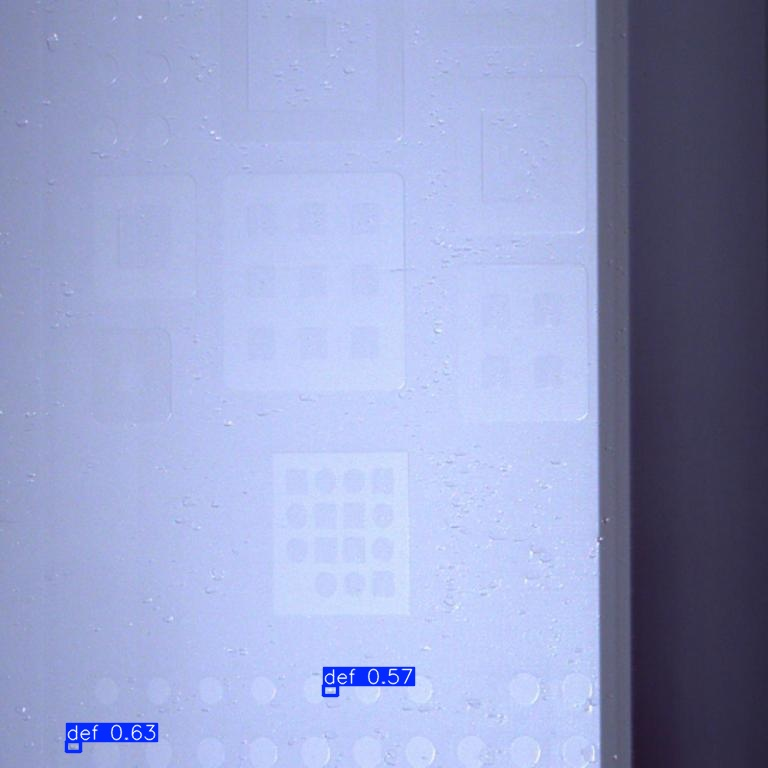

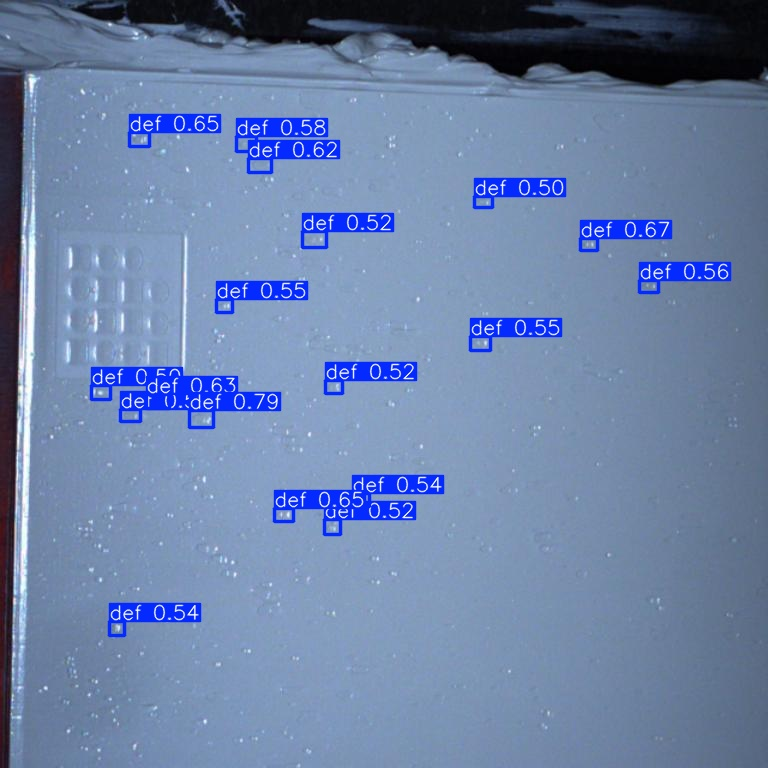

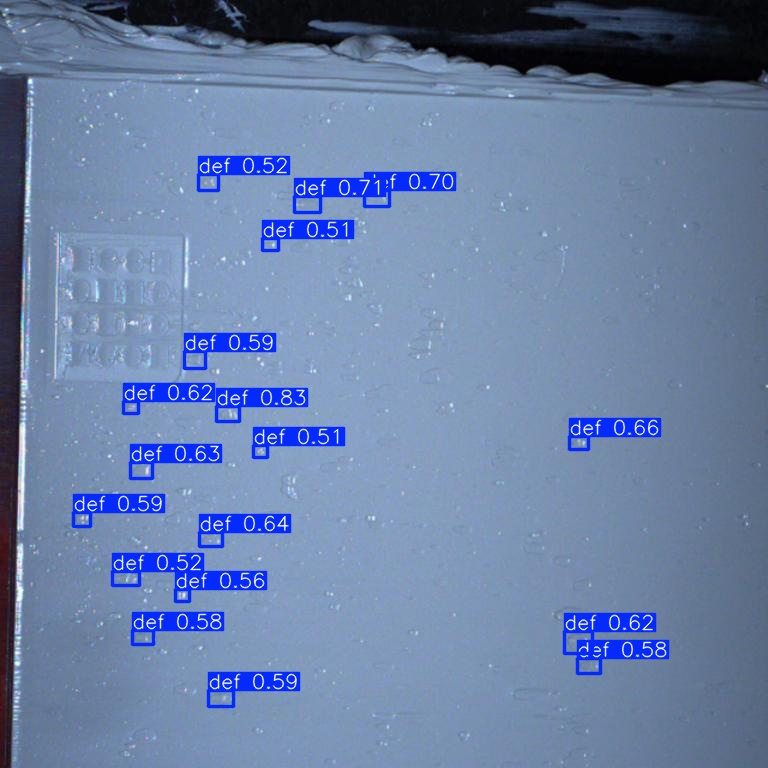

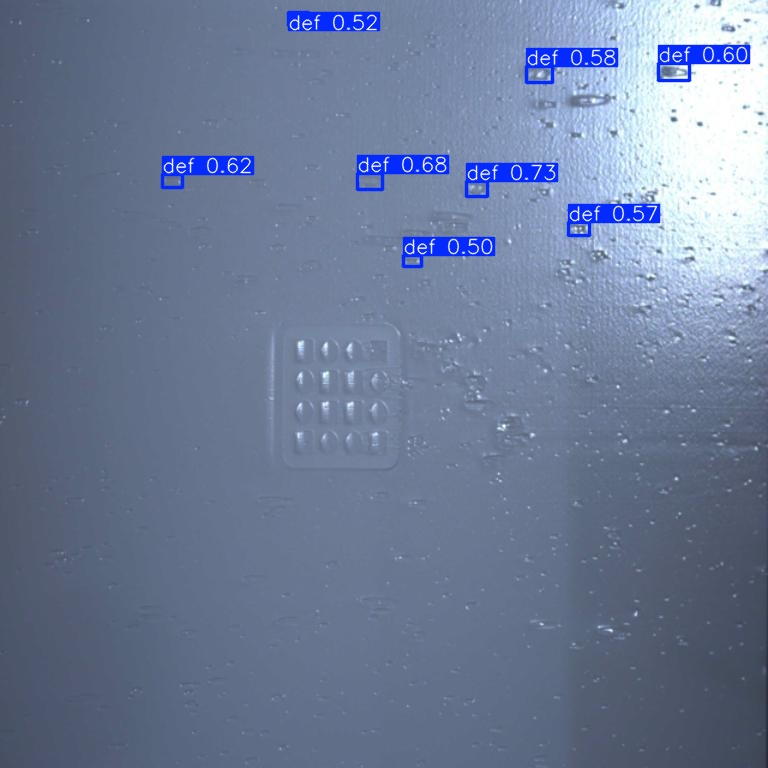

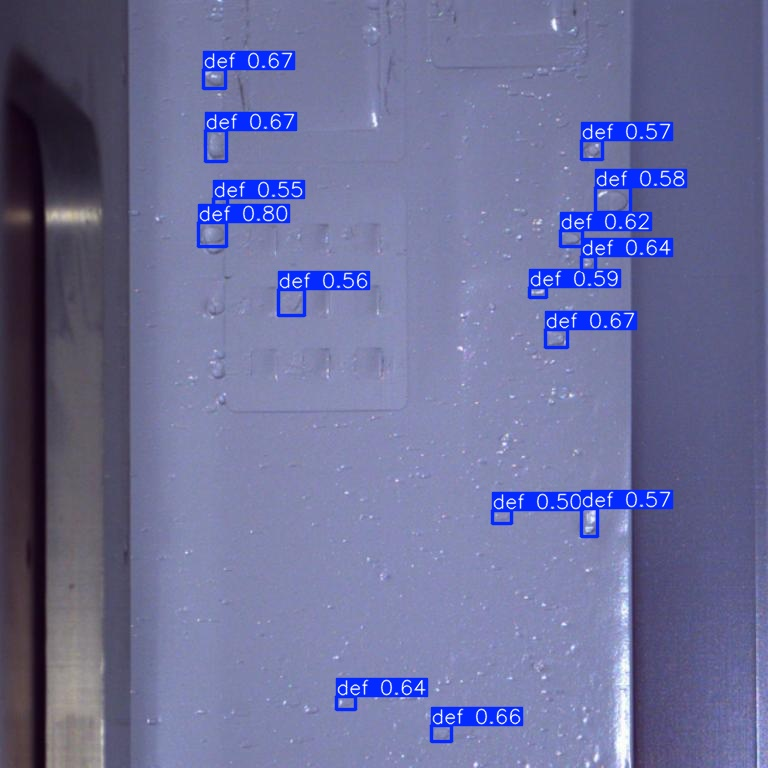

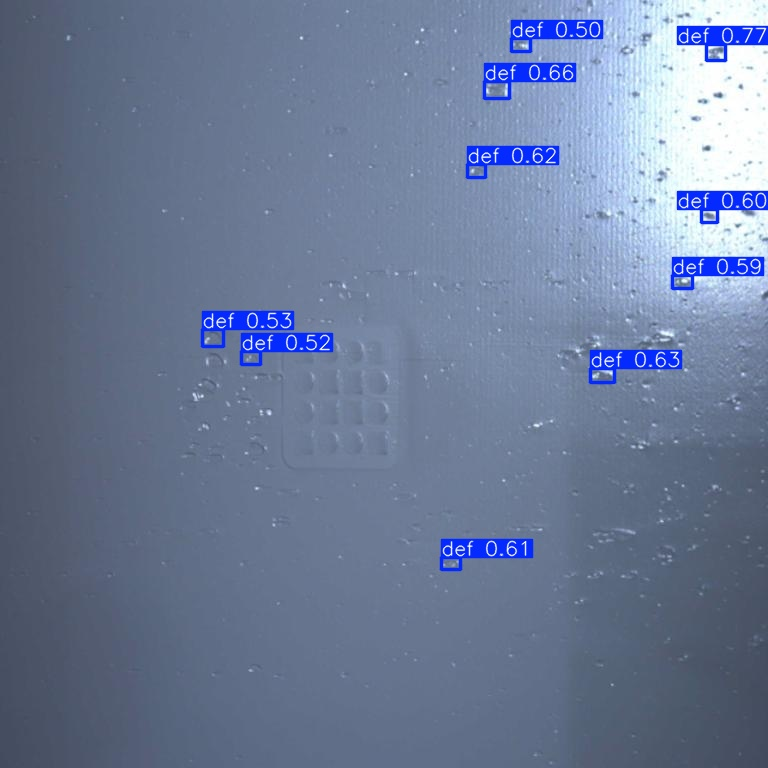

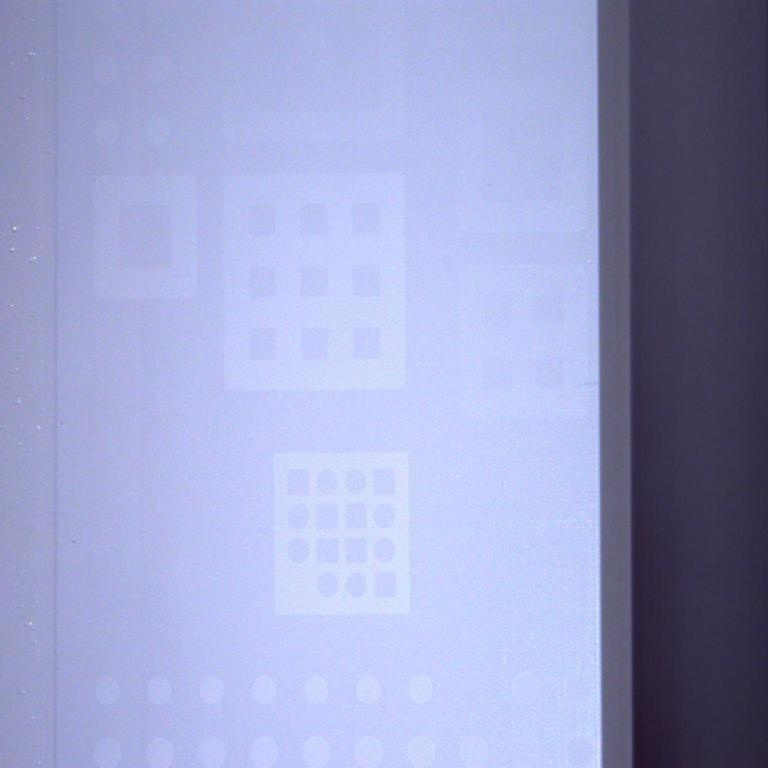

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=640))
    print("\n")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ultralytics/content/runs/detect/train # replace with 'runs' directory

# **Cambiar de formato y evaluar con COCOevaluator**

In [ ]:
# ----------------------------------------
# 🛠️ 1. INSTALACIÓN DE DEPENDENCIAS
# ----------------------------------------
!pip install -q ultralytics pycocotools

In [ ]:
# 🛠️ 1.1 Primero cambiar de nombre la primera carpeta de imagenes creadas para YOLO (/content/vdssdvsdv-yolo)
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("am_boundingbox")
version = project.version(22)
dataset = version.download("coco")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AM_BoundingBox-22 in coco:: 100%|██████████| 233/233 [00:00<00:00, 5314.24it/s]


In [ ]:
# =========================
# 0) RUTAS Y DEPENDENCIAS
# =========================
!pip -q install ultralytics pycocotools

from ultralytics import YOLO
import os, json
from tqdm import tqdm
from collections import defaultdict

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# <<< AJUSTA ESTAS RUTAS >>>
MODEL_PATH     = "/content/runs/detect/train/weights/best.pt"  # pesos YOLO
IMG_DIR        = "/content/AM_BoundingBox-22/valid"  # carpeta de imágenes de validación
GT_COCO_JSON   = "/content/AM_BoundingBox-22/valid/_annotations.coco.json"  # anotaciones COCO GT
PRED_COCO_JSON = "/content/yolo_predictions_coco.json"      # salida de predicciones


In [ ]:
# =========================
# 1) CARGAR GT COCO
# =========================
coco_gt = COCO(GT_COCO_JSON)

# Mapa filename -> image_id (usando el file_name exacto del JSON)
fn_to_imgid = {}
for img in coco_gt.dataset["images"]:
    fn_to_imgid[os.path.basename(img["file_name"])] = img["id"]

# Construir un mapa nombre_de_clase -> category_id (si hay duplicados, se queda con el primero)
name_to_catid = {}
seen = set()
for cat in coco_gt.cats.values():
    if cat["name"] in seen:
        # ignora duplicados exactos de nombre (tu JSON tiene 'defectos' repetido)
        continue
    name_to_catid[cat["name"]] = cat["id"]
    seen.add(cat["name"])

# (Opcional) Mostrar para depuración
print("Categorias COCO (nombre -> id):")
print({k: name_to_catid[k] for k in sorted(name_to_catid)})

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Categorias COCO (nombre -> id):
{'DEFECTOS': 0, 'def': 1}


In [ ]:
# =========================
# 2) CARGAR MODELO YOLO Y VALIDAR CLASES
# =========================
model = YOLO(MODEL_PATH)
yolo_names = model.model.names  # dict: {cls_idx: "class_name"}
print("Clases YOLO detectadas en el modelo:", yolo_names)

# Leer anotaciones COCO para verificar clases
from pycocotools.coco import COCO
coco_gt = COCO(GT_COCO_JSON)
coco_classes = [c['name'] for c in coco_gt.loadCats(coco_gt.getCatIds())]
print("Clases en anotaciones COCO:", coco_classes)

# Comprobar si las clases coinciden
missing_in_coco = [name for name in yolo_names.values() if name not in coco_classes]
if missing_in_coco:
    print("⚠️ Advertencia: estas clases del modelo NO están en las anotaciones COCO:", missing_in_coco)
else:
    print("✅ Todas las clases del modelo están en las anotaciones COCO")

Clases YOLO detectadas en el modelo: {0: 'def'}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Clases en anotaciones COCO: ['DEFECTOS', 'def']
✅ Todas las clases del modelo están en las anotaciones COCO


In [ ]:
# =========================
# 3) EJECUTAR PREDICCIONES
# =========================
# Recolectar rutas de imágenes tal cual están en IMG_DIR
img_paths = [os.path.join(IMG_DIR, f)
             for f in os.listdir(IMG_DIR)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

coco_results = []

# Utilizamos stream=True para no cargar todas las imágenes en memoria
for result in tqdm(model.predict(img_paths, stream=True, verbose=False), total=len(img_paths)):
    # Nombre base del archivo (debería coincidir con file_name en el JSON COCO)
    base = os.path.basename(result.path)
    if base not in fn_to_imgid:
        # Si el file_name en el JSON no incluye carpetas, esto funcionará.
        # Si no hay coincidencia, avisamos y saltamos.
        print(f"⚠️  No se encontró image_id para '{base}'. Se omite.")
        continue
    image_id = fn_to_imgid[base]

    # Dimensiones (para recortar cajas, por si el modelo sale de límites)
    h, w = result.orig_shape

    boxes = result.boxes
    if boxes is None or len(boxes) == 0:
        continue

    # Para cada predicción
    xyxy = boxes.xyxy.cpu().numpy()           # [N, 4] en píxeles
    cls   = boxes.cls.cpu().numpy().astype(int)
    conf  = boxes.conf.cpu().numpy()

    for (x1, y1, x2, y2), c, s in zip(xyxy, cls, conf):
        # nombre de clase desde YOLO
        cls_name = yolo_names.get(int(c), None)
        if cls_name is None:
            continue
        # mapear a category_id de COCO por nombre
        if cls_name not in name_to_catid:
            # Clase del modelo no existe en el JSON COCO → omitir
            continue
        category_id = name_to_catid[cls_name]

        # xyxy -> xywh, recortando a límites de la imagen
        x1 = max(0.0, min(float(x1), w - 1))
        y1 = max(0.0, min(float(y1), h - 1))
        x2 = max(0.0, min(float(x2), w - 1))
        y2 = max(0.0, min(float(y2), h - 1))
        bw = max(0.0, x2 - x1)
        bh = max(0.0, y2 - y1)
        if bw <= 0 or bh <= 0:
            continue

        coco_results.append({
            "image_id": int(image_id),
            "category_id": int(category_id),
            "bbox": [x1, y1, bw, bh],  # COCO: [x, y, width, height]
            "score": float(s)
        })

# Guardar predicciones
with open(PRED_COCO_JSON, "w") as f:
    json.dump(coco_results, f)
print(f"✅ Predicciones COCO guardadas en: {PRED_COCO_JSON} (total: {len(coco_results)})")

100%|██████████| 23/23 [00:00<00:00, 30.79it/s]

✅ Predicciones COCO guardadas en: /content/yolo_predictions_coco.json (total: 1195)


In [ ]:
# =========================
# 4) EVALUAR CON COCOeval
# =========================
coco_dt = coco_gt.loadRes(PRED_COCO_JSON)

coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

# La métrica clave comparable a Ultralytics:
# - mAP@0.50  ≈ coco_eval.stats[1]
# - mAP@0.50:0.95 ≈ coco_eval.stats[0]
print({
    "mAP50-95": coco_eval.stats[0],
    "mAP50": coco_eval.stats[1]
})


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.87s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.523
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.144
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.228
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.132
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.013
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.097
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.334
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1